In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("mnist_train.csv")
df


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
l=df["label"]
print(l.shape)

d=df.drop("label",axis=1)
d.head()

(42000,)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


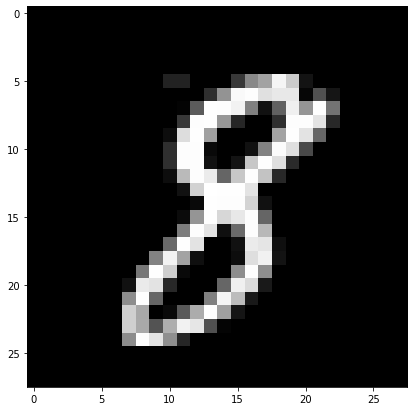

8


In [4]:
# display or plot a number
plt.figure(figsize=(7,7))
idx=20

grid_data = d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()

print(l[idx])

## 2D Visualization using PCA

In [5]:
# pick first 15k data-points  to work on for  time-efficiency
#excersise:perform the same analysis on 42k data points

labels=l.head(15000)
data=d.head(15000)

print("the shape of sample data:" ,data.shape)

the shape of sample data: (15000, 784)


In [6]:
# data-preprocessing: standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)
standardized_data

(15000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
# find covariance matrix which is A^T*A
sample_data=standardized_data
sample_data

#matrix multiplication using numpy
covar_matrix=np.matmul(sample_data.T,sample_data)
#matmul=matrix multiplication
print("the shape of covar_matrix" ,covar_matrix.shape)

the shape of covar_matrix (784, 784)


In [8]:
# finding the top two eigen values and corresponding eigen vectors
#for projecting on to a 2-dim space

from scipy.linalg import eigh

#the parameter 'eighvals' is defined (low to high values)
# eigh function will return the eigh values in ascending order
#this code generates only the top 2 (782 and 783) eigen values
values,vectors=eigh(covar_matrix,eigvals=(782,783))

print("shape of eigen vectors= ",vectors.shape)

# converting the eigen vectors into (2-d) shape for easyness for further

vectors=vectors.T
print("updated shape of eigen vectors=",vectors.shape)



shape of eigen vectors=  (784, 2)
updated shape of eigen vectors= (2, 784)


In [9]:
# projecting the original data sample onn the plane
# formed by the principal eigen vectors by vector-vector multiplication
new_coordinates=np.matmul(vectors,sample_data.T)

print("resultant new data points shape",vectors.shape,"X",sample_data.shape, "=",new_coordinates.shape)


resultant new data points shape (2, 784) X (15000, 784) = (2, 15000)


In [10]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates,labels)).T

#creating a new data frame for plotting the labelled points
dataframe = pd.DataFrame(data = new_coordinates , columns=("1st_principal", "2nd_principal","label"))
print(dataframe.head())



   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


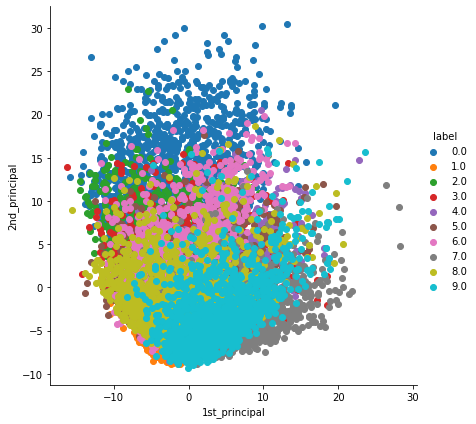

In [11]:
import  seaborn as sns
sns.FacetGrid(dataframe,hue="label", size=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()

## PCA using scikit_learn

In [12]:
#initiating the pca
from sklearn import decomposition
pca=decomposition.PCA()




In [13]:
#configuring the parameters
# the number of componests=2
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
# pca reduced will contain the 2d projects of sample data
print("shape of pca_reduced.shape=",pca_data.shape)

shape of pca_reduced.shape= (15000, 2)


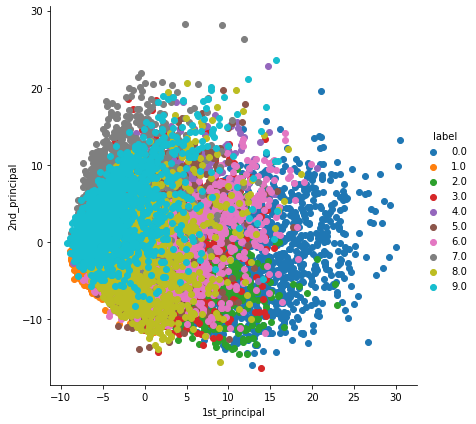

In [14]:
# attaching the label for each 2d data point
pca_data=np.vstack((pca_data.T,labels)).T

#creating the new data frame from which help us in plotting the result data
# pca_df=pd.DataFrame(data=pca_data,columns=("1st_prncipal","2nd_principal","label"))
# sns.FacetGrid(pca_df,hue="label", size=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()

# plt.show()
#creating the new data frame from which help us in plotting the result data
pca_df=pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","label"))
sns.FacetGrid(pca_df,hue="label", height=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()

plt.show()


## pca for dimensionality reduction (not  for visualization)

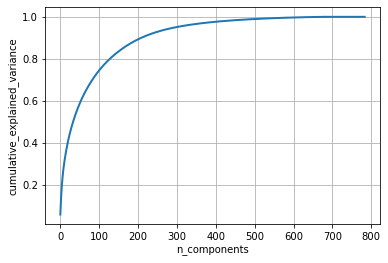

In [15]:
pca.n_components=784
pca_data=pca.fit_transform(sample_data)

percentage_var_explained=pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)

#plot the pca spectrum
plt.figure(1,figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel("cumulative_explained_variance")
plt.show()


 ## t-sne using Scikit-Learn

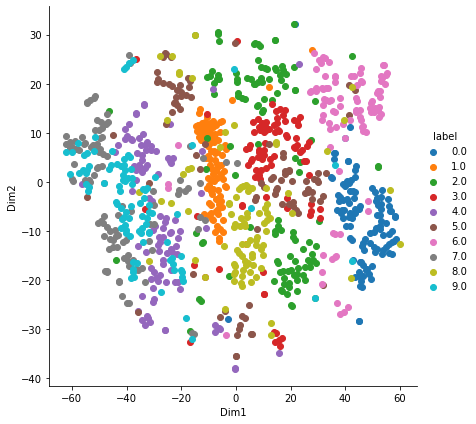

In [16]:
from sklearn.manifold import TSNE
#Picking the top 1000 points as tsne takes a lot of time for 15k points 
data_1000=standardized_data[0:1000,:]
labels_1000=labels[0:1000]

model=TSNE(n_components=2,random_state=0)
#configuring the parameters
#the number of components are 2
#default perplexity is 30
# default learning rate is  200
#default maximun number of iterations for the optimization =1000
tsne_data=model.fit_transform(data_1000)

#creating a new dataframe 
tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim1","Dim2","label"))

#plotting 
sns.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.show()

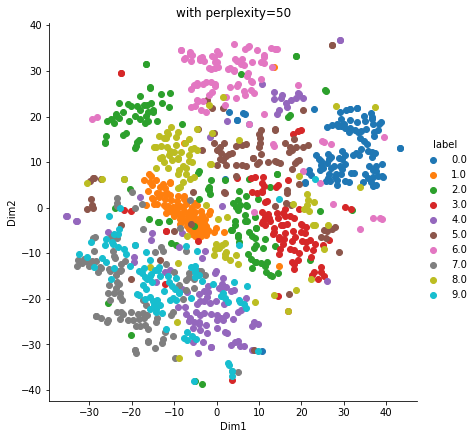

In [17]:
model=TSNE(n_components=2,random_state=0,perplexity=50)

tsne_data=model.fit_transform(data_1000)

#creating a new dataframe 
tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim1","Dim2","label"))

#plotting 
sns.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("with perplexity=50")
plt.show()

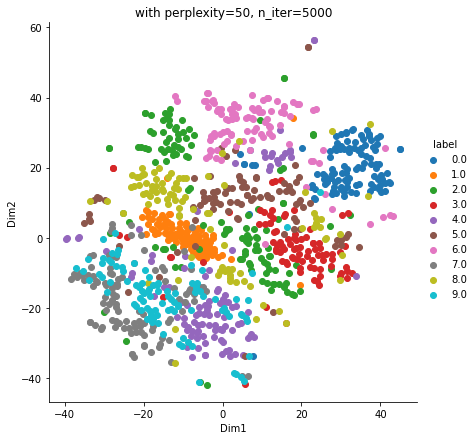

In [18]:
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)

tsne_data=model.fit_transform(data_1000)

#creating a new dataframe 
tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim1","Dim2","label"))

#plotting 
sns.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("with perplexity=50, n_iter=5000")
plt.show()

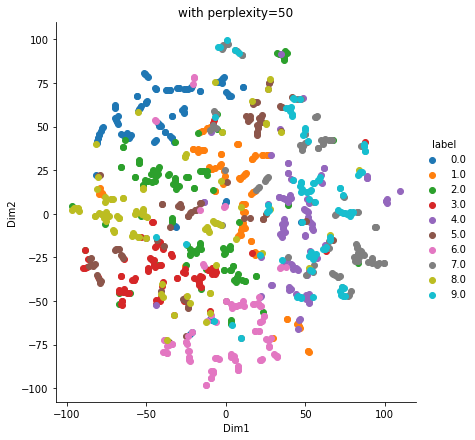

In [19]:
model=TSNE(n_components=2,random_state=0,perplexity=2)

tsne_data=model.fit_transform(data_1000)

#creating a new dataframe 
tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim1","Dim2","label"))

#plotting 
sns.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("with perplexity=50")
plt.show()